Chapter 25
# Make Data Normal

A large portion of the field of statistics is concerned with methods that assume a Gaussian distrbution: the parametric methods are powerful and well understood.  This gives some incentive to use them if possible, even if your data does not have a Gaussian distribution.

It is possible that your data does not look Gaussian or fails a normality test, but can be transformed to make it fit a Gaussian distribution.

# Sample Size
One common reason that a data sample is non-Gaussian is because the size of the data sample is too small.  Many statistical methods were developed where data was scarce: hence, the minimum number of samples for many methods may be as low as 20 or 30 observations.  Thanks to teh law of large numbers, the more data you are able to collect, the more likely your data will be able to be used to describe the underlying population distribution

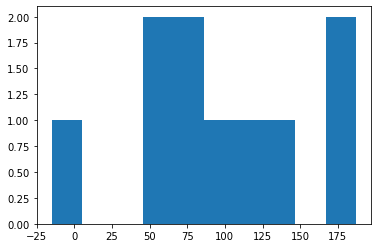

In [1]:
# histogram plot of a small sample of 10 observations drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 50
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot as plt

# seed the random number generator
seed(1)

# generate a univariate data sample
data = 50 * randn(10) + 100

# histogram shows no clear Gaussian or even Gaussian-like distribution
plt.hist(data)
plt.show()

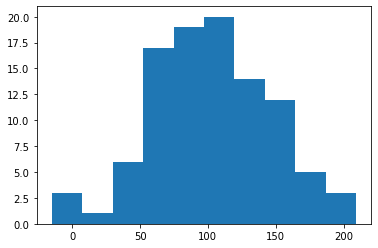

In [2]:
# increase the sample size from 10 to 100 to better expose the Gaussian shape of the data distribution
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot as plt

# seed the random number generator
seed(1)

# generate a univariate data sample
data = 50 * randn(100) + 100

# histogram better shows a Gaussian distribution
plt.hist(data)
plt.show()

# Data Resolution
Perhaps you expect a Gaussian distribution from the data, but no matter the size of the sample, it does not materialise.  A common reason for this is the resolution that you are using to collect the observations.  The distribution of the data may be obscured by the chosen resolution of the data, or the fidelity of the observations.

There may be many reasons why the resulution of the data is being modified prior to modelling e.g.
- the configuration of the mechanism making the observation
- the data is passing through a quality-control process
- the resolution of the database used to store the data

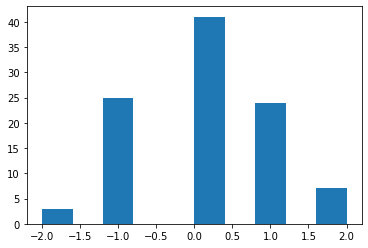

In [3]:
# histogram plot of a low res sample of 100 random Gaussian numbers with a mean of 0 and a standard deviation of 1, with all decimal places removed
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot as plt

# seed the random number generator
seed(1)

# generate a univariate data sample
data = randn(100)

# remove decimal component
data = data.round(0)

# histogram shows a distribution that appears discrete although Gaussian-like
plt.hist(data)
plt.show()

# Extreme Values
A data sample may have a Gaussian distribution, but may be distorted for a number of reasons.  A common reason is the presence of extreme values at the edge of the distribution.  Reasons for extreme values include:
- measurement error
- missing data
- data corruption
- rare events

In such cases, the extreme values (known as outliers) could be identified and removed in order to make the distribution more Gaussian.  This may require domain expertise or consultation with a domain expert, in order to:
- design the criteria for identifying outliers
- remove them from the datas sample, and all data samples that you or your model expect to work with in the future

The example below creates a data sample with 100 random Gaussian numbers scaled to have a mean of 10 and a standard deviation of 5.  An additional 10 zero-valued observations are then added to the distribution: this can happen if missing or corrupt values are assigned the value of zero.  This is a common behaviour in publicly available machine learning datasets.

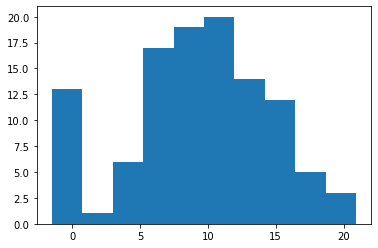

In [4]:
# histogram plot of data with outliers
from numpy.random import seed
from numpy.random import randn
from numpy import zeros
from numpy import append
from matplotlib import pyplot as plt

# seed the random number generator
seed(1)

# generate a univariate data sample
data = 5 * randn(100) + 10

# add extreme values
data = append(data, zeros(10))

# histogram demonstrates how the unexpected high frequency of zero-valued observations disrupts the distribution
plt.hist(data)
plt.show()

# Long Tails
Extreme values can manifest in many ways.  In addition to an abundance of rare events at the edge of the distribution, there may be a long tail on the distribution, in one or both directions.

This can make the distribution look exponential, where in fact it is Gaussian with an abundance of rare events in one direction.  You could use simple threshold values (perhaps based on the number of standard deviations from the mean) to identify and remove long tail values.

The following data sample contains 100 Gaussian random numbers with a mean of 10 and a standard deviation of 5.  An additional 50 uniformly random values in the range 10 to 110 are added, to create a long tail on the distribution.

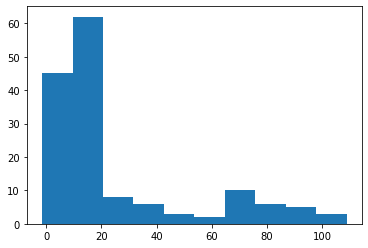

In [5]:
# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot as plt

# seed the random number generator
seed(1)

# generate a univariate data sample
data = 5 * randn(100) + 10

# add long tail
tail = 10 + (rand(50) * 100)
data = append(data, tail)

# histogram shows how the long tail distorts the Gaussian distribution and makes it look almost exponential or perhaps even bimodal (two bumps)
plt.hist(data)
plt.show()

We can use a simple threshold, such as a value of 25, on this databset as a cutoff, and remove all observations higher than this threshold.  This threshold was chosen with prior knowledge of how the data sample was contrived, but with real data you would test different thresholds on your own dataset and evaluate their effect.

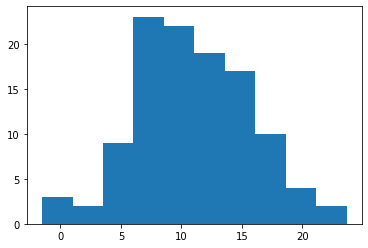

In [6]:
# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot as plt

# seed the random number generator
seed(1)

# generate a univariate data sample
data = 5 * randn(100) + 10

# add long tail
tail = 10 + (rand(50) * 100)
data = append(data, tail)

# trim values
data = [x for x in data if x < 25]

# histogram shows how this simple trimming of the long tail returns the data to a Gaussian distribution
plt.hist(data)
plt.show()

# Power Transforms
The distribution of the data may be normal, but the data may require a transform in order to help expose it.

For example, the data may have a skew, meaning that the bell in the bell shape may be pushed one way or another.  In some cases, this can be corrected by transforming the data via calculating the square root of the observations.

Alternatively, the distribution may be expoential, but may look normal if the observations are transformed by taking the natural logarithm of the values.  Data with this distribution is called log-normal.

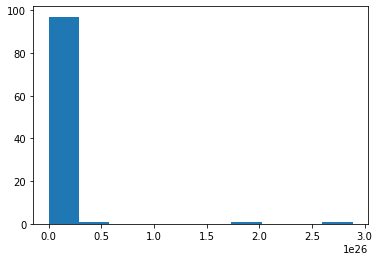

In [7]:
# log-normal distribution
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from matplotlib import pyplot as plt

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# transform to be exponential
data = exp(data)

# histogram shows the exponential distribution - it is not obvious that the data is in fact log-normal
plt.hist(data)
plt.show()

Taking the square root and the logarithm of the observation in order to make the distribution normal belongs to a class of transforms called power transforms. 

The Box-Cox method is a data transform method that is able to perform a range of power transforms, including the log and the square root.  It can be configured to evaluate a suite of transforms automatically and select a best fit.

A limitation of the Box-Cox transform is that it assumes that all values in the data sample are positive.  (An alternative method that does not make this assumption is the Yeo-Johnson transformation)

The SciPy function boxcox() implements the Box-Cox method.  It takes an argument (lambda) that controls the type of transform to perform.  common values include:
- lambda = -1.0 - a reciprocal transform
- lambda = -0.5 - a reciprocal square root transform
- lambda = 0.0 - a log transform
- lambda = 0.5 - a square root transform
- lambda = 1.0 - no transform

In our example, because we know the data is log-normal, we can use the Box-Cox to perform the log transform by setting lambda explicitly to 0

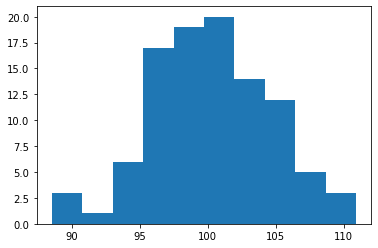

In [9]:
# box-cox transform
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox
from matplotlib import pyplot as plt

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 100

# transform to be exponential
data = exp(data)

# power transform data - we perform the log transform by setting lambda explicitly to 0
data = boxcox(data, 0)

# histogram clearly shows the Gaussian distribution
plt.hist(data)
plt.show()

# Use Anyway
Finally, you may wish to treat the data as Gaussian anyway, expecially if it is already Gaussian-like

In some cases (such as the use of parametric statistical methods) this may lead to optimistic findings.

In other cases (such as machine learning methods that make Gaussian expectations on input data) you may still see good results.

This is a choice you can make, as long as you are aware of the possible downsides

# Extensions

In [14]:
# functions from chapter 24
def do_tests(x):
    visual(x)
    test_shapiro(x)
    test_agostino(x)
    test_anderson(x)

def visual(x):
    from matplotlib import pyplot as plt
    from statsmodels.graphics.gofplots import qqplot
    plt.hist(x)
    plt.show()
    qqplot(x, line='s')
    plt.show()

def test_shapiro(x):
    from scipy.stats import shapiro
    W, p_value = shapiro(x)
    alpha = 0.05
    if p_value > alpha:
	    print('Shapiro Wilk: Sample looks Gaussian (fail to reject H0)')
    else:
	    print('Shapiro Wilk: Sample does not look Gaussian (reject H0)')

def test_agostino(x):
    from scipy.stats import normaltest
    stat, p_value = normaltest(x)
    alpha = 0.05
    if p_value > alpha:
	        print("D'Agostino: Sample looks Gaussian (fail to reject H0)")
    else:
	    print("D'Agostino: Sample does not look Gaussian (reject H0)")

def test_anderson(x):
    from scipy.stats import anderson
    result = anderson(x)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('Anderson: data looks Gaussian at significance level', sl, '(fail to reject H0)')
        else:
            print('Anderson: data does not look Gaussian at significance level', sl, '(reject H0)')

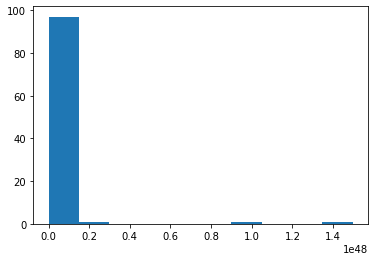

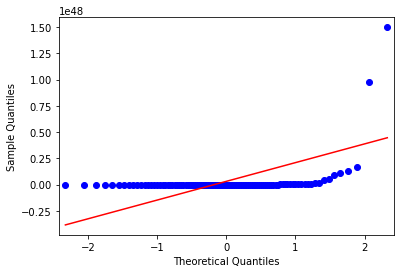

Shapiro Wilk: Sample looks Gaussian (fail to reject H0)
D'Agostino: Sample does not look Gaussian (reject H0)
Anderson: data does not look Gaussian at significance level 15.0 (reject H0)
Anderson: data does not look Gaussian at significance level 10.0 (reject H0)
Anderson: data does not look Gaussian at significance level 5.0 (reject H0)
Anderson: data does not look Gaussian at significance level 2.5 (reject H0)
Anderson: data does not look Gaussian at significance level 1.0 (reject H0)

Lambda value used for transformation: 0.00033776848517681204


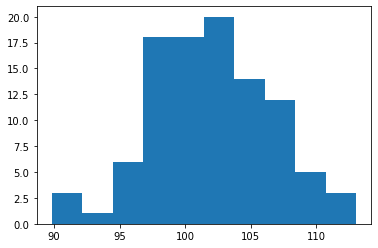

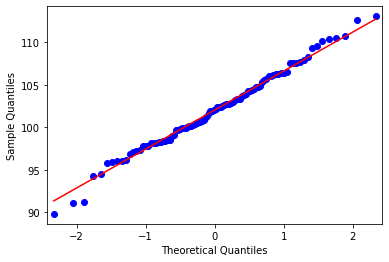

Shapiro Wilk: Sample looks Gaussian (fail to reject H0)
D'Agostino: Sample looks Gaussian (fail to reject H0)
Anderson: data looks Gaussian at significance level 15.0 (fail to reject H0)
Anderson: data looks Gaussian at significance level 10.0 (fail to reject H0)
Anderson: data looks Gaussian at significance level 5.0 (fail to reject H0)
Anderson: data looks Gaussian at significance level 2.5 (fail to reject H0)
Anderson: data looks Gaussian at significance level 1.0 (fail to reject H0)


In [32]:
# As before start with observations from a gaussian distribution which is then transformed to be exponential
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 100

# transform to be exponential
data = exp(data)
do_tests(data)

# power transform data
fitted_data, best_lambda = boxcox(data)
print('\nLambda value used for transformation:', best_lambda)

# run normality tests (as per chapter 24)
do_tests(fitted_data)

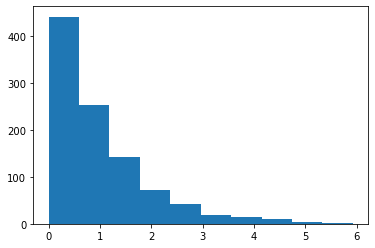

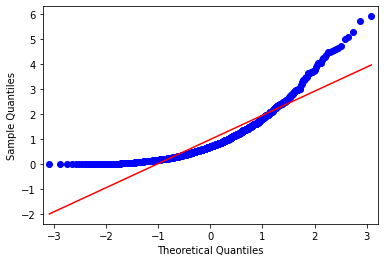

Shapiro Wilk: Sample does not look Gaussian (reject H0)
D'Agostino: Sample does not look Gaussian (reject H0)
Anderson: data does not look Gaussian at significance level 15.0 (reject H0)
Anderson: data does not look Gaussian at significance level 10.0 (reject H0)
Anderson: data does not look Gaussian at significance level 5.0 (reject H0)
Anderson: data does not look Gaussian at significance level 2.5 (reject H0)
Anderson: data does not look Gaussian at significance level 1.0 (reject H0)

Lambda value used for transformation: 0.2906364326347218


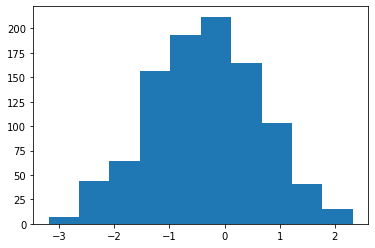

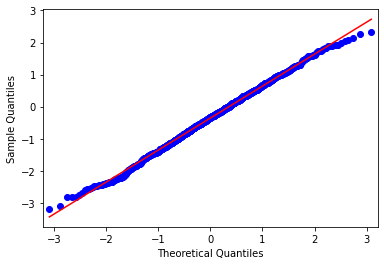

Shapiro Wilk: Sample looks Gaussian (fail to reject H0)
D'Agostino: Sample looks Gaussian (fail to reject H0)
Anderson: data looks Gaussian at significance level 15.0 (fail to reject H0)
Anderson: data looks Gaussian at significance level 10.0 (fail to reject H0)
Anderson: data looks Gaussian at significance level 5.0 (fail to reject H0)
Anderson: data looks Gaussian at significance level 2.5 (fail to reject H0)
Anderson: data looks Gaussian at significance level 1.0 (fail to reject H0)


In [33]:
# this time just generate observations from an exponential distribution
from numpy.random import seed
from numpy.random import exponential
from scipy.stats import boxcox

# seed the random number generator
seed(1)

# generate observations drawn from an exponential distribution
data = exponential(size=1000)
do_tests(data)

# power transform data
fitted_data, best_lambda = boxcox(data)
print('\nLambda value used for transformation:', best_lambda)

# run normality tests (as per chapter 24)
do_tests(fitted_data)

Training data


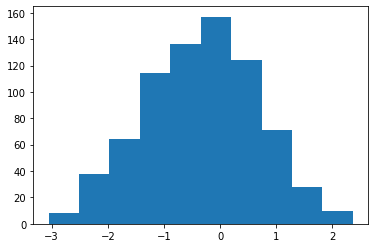

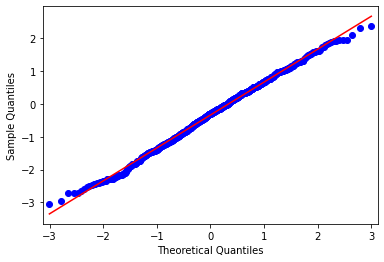

Shapiro Wilk: Sample looks Gaussian (fail to reject H0)
D'Agostino: Sample does not look Gaussian (reject H0)
Anderson: data looks Gaussian at significance level 15.0 (fail to reject H0)
Anderson: data looks Gaussian at significance level 10.0 (fail to reject H0)
Anderson: data looks Gaussian at significance level 5.0 (fail to reject H0)
Anderson: data looks Gaussian at significance level 2.5 (fail to reject H0)
Anderson: data looks Gaussian at significance level 1.0 (fail to reject H0)

Test data


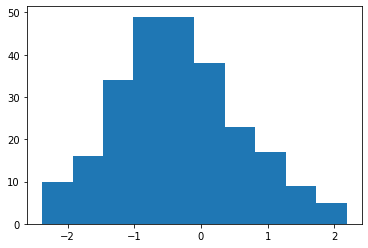

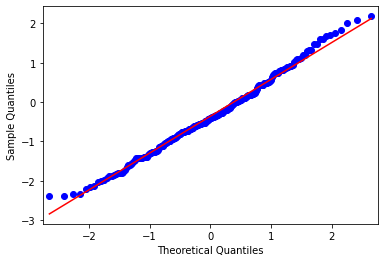

Shapiro Wilk: Sample looks Gaussian (fail to reject H0)
D'Agostino: Sample looks Gaussian (fail to reject H0)
Anderson: data looks Gaussian at significance level 15.0 (fail to reject H0)
Anderson: data looks Gaussian at significance level 10.0 (fail to reject H0)
Anderson: data looks Gaussian at significance level 5.0 (fail to reject H0)
Anderson: data looks Gaussian at significance level 2.5 (fail to reject H0)
Anderson: data looks Gaussian at significance level 1.0 (fail to reject H0)


In [34]:
# this time split into train and test data
from numpy.random import seed
from numpy.random import exponential
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

# seed the random number generator
seed(1)

# generate observations drawn from an exponential distribution
data = exponential(size=1000)

# split into train and test data
train, test = train_test_split(data, shuffle=False)

# power transform training data
train_data, fitted_lambda = boxcox(train)

# run normality tests (as per chapter 24)
print('Training data')
do_tests(train_data)

# now apply value of lambda to test data
test_data = boxcox(test, fitted_lambda)
print('\nTest data')
do_tests(test_data)